In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [46]:
data_dict = {
    "x1": [0, 0, 1, 1],
    "x2": [0, 1, 0, 1],
    "y": [0, 1, 1, 1]
}

In [3]:
data = pd.DataFrame(data = data_dict)

In [4]:
data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
tst = data[["x1", "x2"]]

In [21]:
np.shape(tst)[1]

2

In [47]:
class LogisticRegression:
    
    def __init__(self, learning_rate = 0.001, 
                 n_iter = 1000,
                 epsilon = 1e-6):
        
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.epsilon = epsilon
        
    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-z))
    
    def _init_params(self, X):
        
        n_features = np.shape(X)[1]
        
        self.coef_ = np.random.rand(n_features)
        self.intercept_ = np.zeros(1)
    
    def fit(self, X, y):
        
        X = np.array(X)
        y = np.array(y)
        
        self._init_params(X)

        for i in tqdm(range(self.n_iter)):
            y_pred = self.predict_proba(X = X)
            
            grad_coef_ = -(y - y_pred).dot(X)
            grad_intercept_ = -(y - y_pred).dot(np.ones(len(X)))
            
            self.coef_ -= self.learning_rate * grad_coef_
            self.intercept_ -= self.learning_rate * grad_intercept_
            
            param_changes_ = np.abs(np.hstack((grad_coef_, grad_intercept_)))
            param_ = np.abs(np.hstack((self.coef_, self.intercept_)))
            if np.max(param_changes_)/np.max(param_) < self.epsilon:
                break
    
    def predict_proba(self, X):
        logits = np.dot(X, self.coef_) + self.intercept_
        proba = self._sigmoid(logits)
        
        return proba
    
    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype("int")

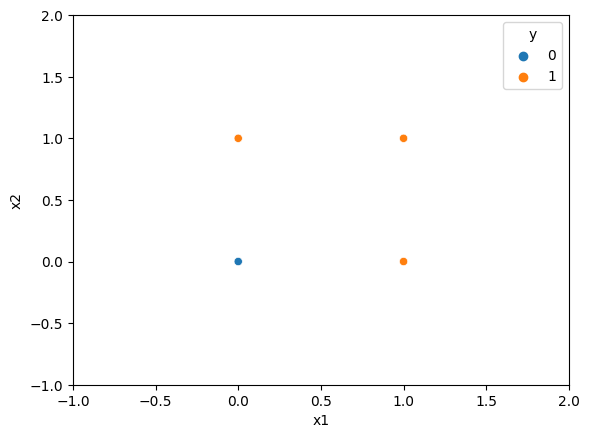

In [48]:
sns.scatterplot(data=data,
                x="x1",
                y="x2",
                hue="y")


plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

In [49]:
X = data[["x1", "x2"]]
y = data["y"]

In [50]:
logreg = LogisticRegression(n_iter=50000)

In [51]:
logreg.fit(X, y)

100%|██████████████████████████████████| 50000/50000 [00:02<00:00, 18962.77it/s]


In [52]:
w = logreg.coef_
b = logreg.intercept_

w, b

(array([5.39862332, 5.41791394]), array([-2.20841453]))

In [53]:
y_pred_proba = logreg.predict_proba(X)
y_pred = logreg.predict(X)

print(f"Predict proba : \n{y_pred_proba}")
print(f"Prediction    : \n{y_pred}")

Predict proba : 
[0.0989974  0.9611902  0.96046415 0.99981742]
Prediction    : 
[0 1 1 1]


In [54]:
data["y_pred"] = y_pred

In [55]:
data

,x1,x2,y,y_pred
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,1


In [56]:
m = -w[0]/w[1]
c = -b[0]/w[1]

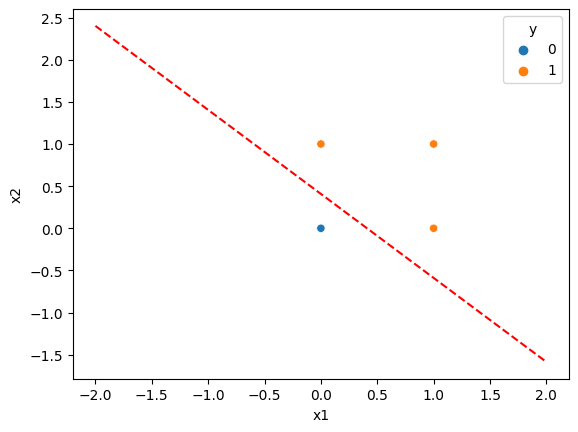

In [57]:
sns.scatterplot(data=data,
                x="x1",
                y="x2",
                hue="y")


x_support = np.linspace(-2, 2)
y_support = m*x_support + c

plt.plot(x_support, y_support, "--r")

plt.show()